In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
def transform(P, p, i):
    from_prev = P[i-1] * .5
    from_next = P[i+1] * .5 * p[i]/p[i+1]
    to_prev = P[i] * .5 * p[i-1]/p[i]
    to_next = P[i] * .5 if p[i+1] != np.inf else 0
    from_self = P[i] - (to_prev + to_next)
    return from_prev + from_next + from_self

In [113]:
islands = np.arange(8)[1:]

In [114]:
islands

array([1, 2, 3, 4, 5, 6, 7])

In [118]:
# population
islands_p = deepcopy(islands)
islands_p = np.insert(islands_p, [0], 0)
islands_p = np.append(islands_p, np.inf)
islands_p

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7., inf])

In [119]:
islands_P = np.zeros(7)
islands_P[3] = 1
islands_P

array([0., 0., 0., 1., 0., 0., 0.])

In [120]:
def extended_walk(w):
    w = np.insert(w, 0, 0)
    w = np.append(w, 0)
    return w

In [121]:
walk = [extended_walk(islands_P)]

for _ in range(20):
    prev_walk = walk[-1]
    walk.append(
        extended_walk(
            [transform(prev_walk, islands_p, i) for i in islands]
        )
    )

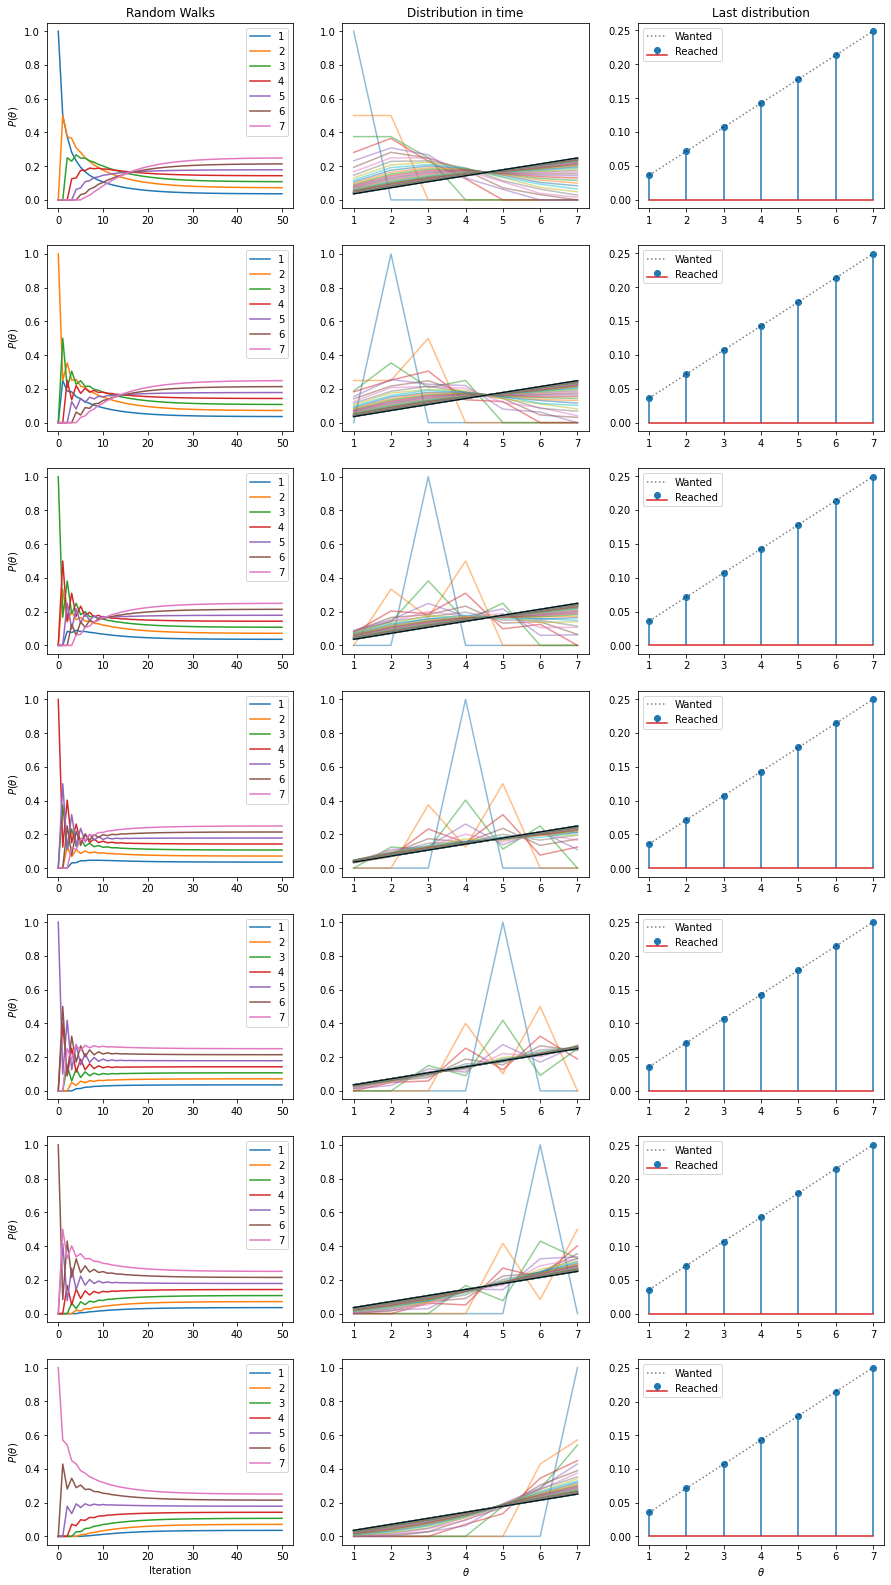

In [122]:
iterations = 50

fig, ax = plt.subplots(7, 3, figsize=(15, 28))

for s in range(7):
    islands_P = np.zeros(7)
    islands_P[s] = 1
    walk = [extended_walk(islands_P)]
    for _ in range(iterations):
        prev_walk = walk[-1]
        walk.append(
            extended_walk(
                [transform(prev_walk, islands_p, i) for i in islands]
            )
        )
    for i in islands:
        ax[s,0].plot(np.array(walk)[:,i], label=i)
        ax[s,0].legend()
        ax[s,0].set_ylabel(r"$P(\theta)$")
    for i in range(len(walk)):
        ax[s,1].plot(islands, walk[i][1:8], alpha=.5)
    ax[s,1].plot(islands, walk[-1][1:8], c="k", lw=1)
    ax[s,2].stem(
        islands, walk[-1][1:8], use_line_collection=True,
        label="Reached"
    )
    ax[s,2].plot(
        [1, 7],
        [walk[-1][1], walk[-1][7]],
        c="k", ls=":", alpha=.5,
        label="Wanted"
    )
    ax[s,2].legend()

ax[0,0].set_title("Random Walks")
ax[0,1].set_title("Distribution in time")
ax[0,2].set_title("Last distribution")
ax[-1,0].set_xlabel("Iteration")
ax[-1,1].set_xlabel(r"$\theta$")
ax[-1,2].set_xlabel(r"$\theta$")


fig.set_facecolor('w')
plt.show();

Si puó dimostrare facilmente che se la distribuzione iniziale é la distribuzione target, la distribuzione dello stato successivo del sistema non cambia. Ovvero se

$$
P(\theta) = \frac{\theta}{\sum \theta} \;,\; \forall \theta
$$

allora lo stato successivo $P(\theta)^*$ é

$$
P(\theta)^* = P(\theta) \;,\; \forall \theta
$$

Sappiamo infatti che la probabilitá di essere in $\theta$ é la somma della probabilitá di arrivarci dalla precedente $\theta-1$, di arrivarci dalla successiva $\theta+1$, di restare su $\theta$ se si é giá lí, dunque

$$
P(\theta)^* = P_{\leftarrow(\theta-1)} + P_{\leftarrow(\theta+1)} + P_{\leftarrow(\theta)}
$$

laddove, la probabilitá di arrivare dalla precedente dipende solo dal lancio della moneta quindi

$$
P_{\leftarrow(\theta-1)} = P(\theta-1) \cdot \frac{1}{2} =
\frac{\theta-1}{\sum \theta} \cdot \frac{1}{2} =
\frac{\theta-1}{2 \sum \theta}
$$

la probabilitá di arrivare dalla successiva dipende sia dal lancio della moneta che dal giro di roulette (e quindi dal rapporto tra i due parametri)

$$
P_{\leftarrow(\theta+1)} = 
P(\theta+1) \cdot \frac{1}{2} \cdot \frac{\theta}{\theta+1} =
\frac{\theta+1}{\sum \theta} \cdot \frac{1}{2} \cdot \frac{\theta}{\theta+1} =
\frac{\theta}{2 \sum \theta}
$$

la probabilitá di restare su theta é pari alla probabilitá di esserci meno la probabilitá di andare sulla precedente e sulla successiva

$$
P_{\leftarrow(\theta)} =
P(\theta) - (P_{\rightarrow(\theta-1)} +  P_{\rightarrow(\theta+1)})
$$

dove (come in precedenza)

$$
P_{\rightarrow(\theta-1)} =
P(\theta) \cdot \frac{1}{2} \cdot \frac{\theta-1}{\theta} =
\frac{\theta}{\sum \theta} \cdot \frac{1}{2} \cdot \frac{\theta-1}{\theta} =
\frac{\theta-1}{2 \sum \theta}
$$

e similmente

$$
P_{\rightarrow(\theta+1)} =
P(\theta) \cdot \frac{1}{2} =
\frac{\theta}{\sum \theta} \cdot \frac{1}{2} =
\frac{\theta}{2 \sum \theta}
$$

pertanto

$$
P(\theta)^* =
\frac{\theta-1}{2 \sum \theta} + \frac{\theta}{2 \sum \theta} +
\frac{\theta}{\sum \theta} -
\frac{\theta-1}{2 \sum \theta} - \frac{\theta}{2 \sum \theta} =
\frac{\theta}{\sum \theta}
$$


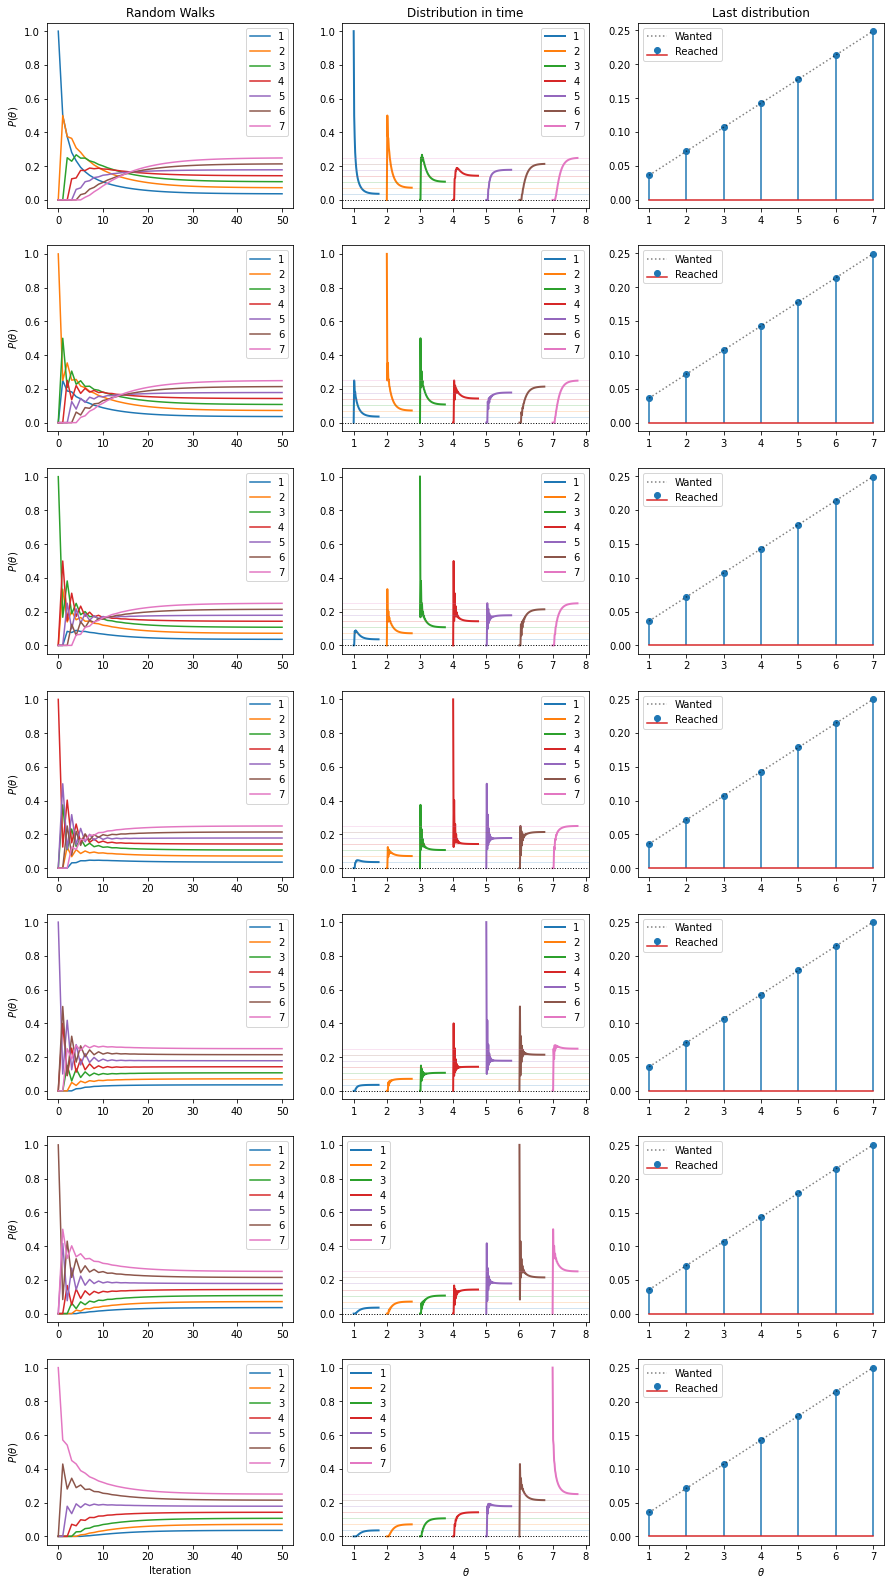

In [123]:
iterations = 50

fig, ax = plt.subplots(7, 3, figsize=(15, 28))

for s in range(7):
    islands_P = np.zeros(7)
    islands_P[s] = 1
    walk = [extended_walk(islands_P)]
    for _ in range(iterations):
        prev_walk = walk[-1]
        walk.append(
            extended_walk(
                [transform(prev_walk, islands_p, i) for i in islands]
            )
        )
    for i in islands:
        ax[s,0].plot(np.array(walk)[:,i], label=i)
        ax[s,0].legend()
        ax[s,0].set_ylabel(r"$P(\theta)$")
        
    for j in range(7):
        ax[s,1].axhline((j+1)/sum(islands), c=f"C{j}", alpha=.2, lw=1)
        _x = []
        _y = []
        for i in range(len(walk)):
            _x.append((j+1)+(i*.015))
            _y.append(walk[i][j+1])
        ax[s,1].plot(
            _x, _y, label=j+1,
            c=f"C{j}", ls="-", lw=2
        )
        #ax[s,1].scatter(_x[-1], _y[-1], c="k", s=2)
    ax[s,1].axhline(0, c="k", lw=1, ls=":")
    ax[s,1].legend()
    ax[s,2].stem(
        islands, walk[-1][1:8], use_line_collection=True,
        label="Reached"
    )
    ax[s,2].plot(
        [1, 7],
        [walk[-1][1], walk[-1][7]],
        c="k", ls=":", alpha=.5,
        label="Wanted"
    )
    ax[s,2].legend()

ax[0,0].set_title("Random Walks")
ax[0,1].set_title("Distribution in time")
ax[0,2].set_title("Last distribution")
ax[-1,0].set_xlabel("Iteration")
ax[-1,1].set_xlabel(r"$\theta$")
ax[-1,2].set_xlabel(r"$\theta$")


fig.set_facecolor('w')
plt.show();

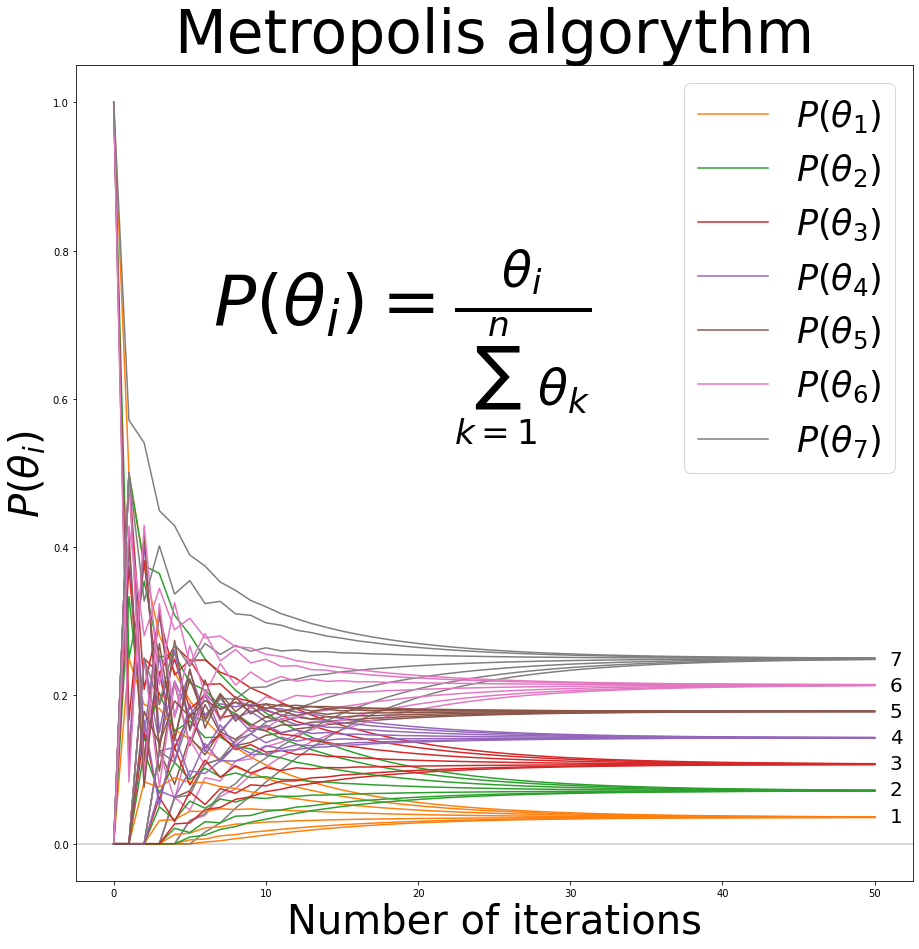

In [124]:
iterations = 50

fig, ax = plt.subplots(figsize=(15, 15))

for s in range(7):
    islands_P = np.zeros(7)
    islands_P[s] = 1
    walk = [extended_walk(islands_P)]
    for _ in range(iterations):
        prev_walk = walk[-1]
        walk.append(
            extended_walk(
                [transform(prev_walk, islands_p, i) for i in islands]
            )
        )
    for i in islands:
        if not s:
            ax.plot(
                np.array(walk)[:,i], 
                label=fr"$P(\theta_{i})$", 
                c=f"C{i}"
            )
            ax.text(
                51, walk[-1][i],
                fr"{i}",
                ha="left", va="center",
                fontsize=20
            )
        else:
            ax.plot(np.array(walk)[:,i], c=f"C{i}")

ax.set_title("Metropolis algorythm", fontsize=60)
ax.legend(loc="upper right",  fontsize=35)
ax.axhline(0, c="k", alpha=.2)
ax.text(
    6.5, .7,
    r"$P(\theta_i) = \frac{\theta_i}{\sum_{k=1}^n \theta_k}$",
    fontsize=70,
)
ax.set_ylabel(r"$P(\theta_i)$", fontsize=40)
ax.set_xlabel("Number of iterations", fontsize=40)
fig.set_facecolor('w')
plt.show();

In [125]:
def from_prob(r, c, s):
    r = r+1
    c = c+1
    if r == c:
        if not r:
            return 1 - .5
        if r == s:
            return 1 - .5*(c-1)/r
        return 1 - .5 - .5*(c-1)/r
    if c == r-1:
        return .5
    if c == r+1:
        return .5*r/c
    return 0

In [126]:
trans_matrix = np.zeros((7,7))

<StemContainer object of 3 artists>

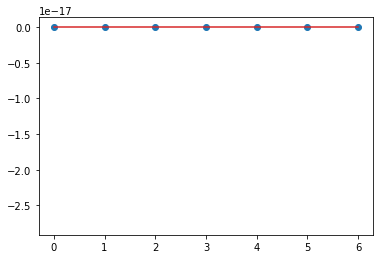

In [127]:
plt.stem(trans_matrix @ np.ones(7), use_line_collection=True)

In [128]:
for r in range(7):
    for c in range(7):
        trans_matrix[r,c] = from_prob(r,c,7)

In [129]:
pd.DataFrame(trans_matrix)

,0,1,2,3,4,5,6
0,0.5,0.25,0.000000,0.000,0.0,0.000000,0.000000
1,0.5,0.25,0.333333,0.000,0.0,0.000000,0.000000
2,0.0,0.50,0.166667,0.375,0.0,0.000000,0.000000
3,0.0,0.00,0.500000,0.125,0.4,0.000000,0.000000
4,0.0,0.00,0.000000,0.500,0.1,0.416667,0.000000
5,0.0,0.00,0.000000,0.000,0.5,0.083333,0.428571
6,0.0,0.00,0.000000,0.000,0.0,0.500000,0.571429


In [131]:
trans_matrix.sum(axis=0)

array([1., 1., 1., 1., 1., 1., 1.])

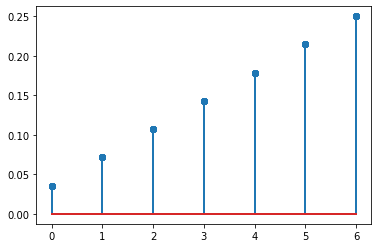

In [62]:
for x in range(7):
    d = np.zeros(7)
    d[x] = 1
    for i in range(100):
        d = trans_matrix @ d
    plt.stem(d, use_line_collection=True)

In [2]:
regioni = {
    "Lombardia": {
        "pop": 10060574,
        "den": 422
    },
}

In [316]:
import json
with open("../../../regioni.province.comuni.json", "r") as f:
    reg = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '../../../regioni.province.comuni.json'

In [20]:
regioni = {}
for regione in reg:
    regioni.update({regione["nome"]: 0})
    for provincia in regione["province"]:
        for comune in provincia["comuni"]:
            if comune["abitanti_2012"]:
                regioni[regione["nome"]] += comune["abitanti_2012"]

In [29]:
regioni = {k: v for k, v in sorted(regioni.items(), key=lambda item: item[1])}

In [26]:
regioni[list(regioni.keys())[0]]

4374052

In [43]:
def from_prob_reg(r, c, s):
    if r == c:
        if not r:
            return 1 - .5
        if r == s-1:
            return 1 - .5*(regioni[list(regioni.keys())[c-1]])/regioni[list(regioni.keys())[r]]
        return 1 - .5 - .5*(regioni[list(regioni.keys())[c-1]])/regioni[list(regioni.keys())[r]]
    if c == r-1:
        return .5
    if c == r+1:
        return .5 * regioni[list(regioni.keys())[r]]/regioni[list(regioni.keys())[c]]
    return 0

In [44]:
trans_reg = np.zeros((20,20))

In [45]:
for r in range(20):
    for c in range(20):
        trans_reg[r,c] = from_prob_reg(r,c,20)

In [46]:
pd.DataFrame(trans_reg)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.5,0.204001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
1,0.5,0.295999,0.271906,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.500000,0.228094,0.325078,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.500000,0.174922,0.428869,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,0.000000,0.500000,0.071131,0.443435,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
5,0.0,0.000000,0.000000,0.000000,0.500000,0.056565,0.495025,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
6,0.0,0.000000,0.000000,0.000000,0.000000,0.500000,0.004975,0.380783,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.119217,0.49362,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.00638,0.477063,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.50000,0.022937,0.418841,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


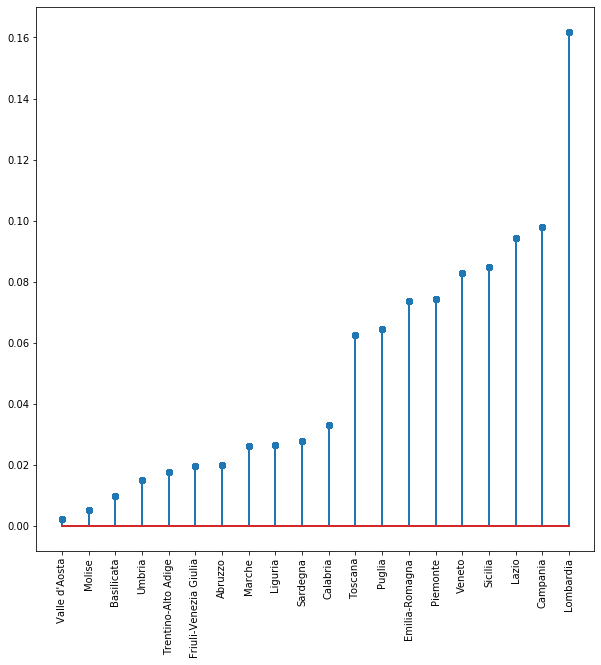

In [57]:
fig, ax = plt.subplots(figsize=(10,10))
for x in range(20):
    d = np.zeros(20)
    d[x] = 1
    for i in range(1000):
        d = trans_reg @ d
    ax.stem(d, use_line_collection=True)
plt.xticks(np.arange(20), regioni.keys(), rotation=90)
fig.set_facecolor('w')
plt.show();

In [547]:
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv'
states = pd.read_csv(url,
                     usecols=['data', 'denominazione_regione', 'totale_casi'],
                     parse_dates=['data'],
                     index_col=['data', 'denominazione_regione'],
                     squeeze=True).sort_index()

In [548]:
states

data                 denominazione_regione
2020-02-24 18:00:00  Abruzzo                      0
                     Basilicata                   0
                     Calabria                     0
                     Campania                     0
                     Emilia-Romagna              18
                                              ...  
2020-06-07 17:00:00  Sicilia                   3451
                     Toscana                  10135
                     Umbria                    1432
                     Valle d'Aosta             1191
                     Veneto                   19183
Name: totale_casi, Length: 2205, dtype: int64

In [561]:
data = "2020-06-01 17:00:00"
cases_tot = states.loc[data].sum()
print(cases_tot)

233197


In [563]:
readme = r'regioni.csv'
regioni_table = pd.read_csv(readme, index_col="Regione")

In [562]:
regioni_cases_distr = {}
for r in regioni_table.index:
    print(r)
    if "Trent" not in r:
        regioni_cases_distr.update({
            r: states.loc[data, r] / cases_tot
        })
    else:
        regioni_cases_distr.update({
            r: (states.loc[data, "P.A. Bolzano"] + states.loc[data, "P.A. Trento"]) / cases_tot
        })
regioni_cases_distr

Lombardia
Lazio
Campania
Sicilia
Veneto
Emilia-Romagna
Piemonte
Puglia
Toscana
Calabria
Sardegna
Liguria
Marche
Abruzzo
Friuli Venezia Giulia
Trentino-Alto Adige
Umbria
Basilicata
Molise
Valle d'Aosta


{'Lombardia': 0.38172875294279085,
 'Lazio': 0.03318224505461048,
 'Campania': 0.02060918450923468,
 'Sicilia': 0.014764340879170829,
 'Veneto': 0.08213656264874762,
 'Emilia-Romagna': 0.11925110528866152,
 'Piemonte': 0.1314682435880393,
 'Puglia': 0.019288412801193842,
 'Toscana': 0.04334103783496357,
 'Calabria': 0.004965758564647058,
 'Sardegna': 0.005819114311076043,
 'Liguria': 0.04167720854041861,
 'Marche': 0.028859719464658637,
 'Abruzzo': 0.013915273352573147,
 'Friuli Venezia Giulia': 0.014039631727680888,
 'Trentino-Alto Adige': 0.030146185414049065,
 'Umbria': 0.006136442578592349,
 'Basilicata': 0.0017109997126892713,
 'Molise': 0.0018696638464474242,
 "Valle d'Aosta": 0.0050901169397548}

In [564]:
regioni_table

,Popolazione,Superficie,Densità,Comuni,Province,Confini
Regione,,,,,,
Lombardia,10060574,23863,422,1506,12,Trentino-Alto Adige;Veneto;Piemonte;Emilia-Rom...
Lazio,5879082,17232,341,378,5,Toscana;Umbria;Abruzzo;Campania;Sardegna
Campania,5801692,13670,424,550,5,Lazio;Molise;Basilicata;Puglia
Sicilia,4999891,25832,194,390,9,Calabria
Veneto,4905854,18345,267,563,7,Lombardia;Friuli Venezia Giulia;Trentino-Alto ...
Emilia-Romagna,4459477,22452,199,328,9,Lombardia;Liguria;Toscana;Veneto;Marche
Piemonte,4356406,25387,172,1181,8,Valle d'Aosta;Lombardia;Liguria
Puglia,4029053,19540,206,257,6,Molise;Basilicata;Campania
Toscana,3729641,22987,162,273,10,Emilia-Romagna;Umbria;Lazio


In [580]:
init_distr = {}
data_start = "2020-03-11 17:00:00"
cases_tot_start = states.loc[data_start].sum()
for r in regioni_table.index:
    if "Trent" not in r:
        init_distr.update({
            r: states.loc[data_start, r]/cases_tot_start
        })
    else:
        init_distr.update({
            r: (states.loc[data_start, "P.A. Bolzano"] + states.loc[data_start, "P.A. Trento"]) / cases_tot_start
        })
print(init_distr)
print(sum(init_distr.values()))
list(init_distr.values())

{'Lombardia': 0.5841758947199487, 'Lazio': 0.01203659123736158, 'Campania': 0.01235756700369122, 'Sicilia': 0.0066602471513400735, 'Veneto': 0.08208955223880597, 'Emilia-Romagna': 0.13954421441181192, 'Piemonte': 0.04020221473278768, 'Puglia': 0.00617878350184561, 'Toscana': 0.025678061306371368, 'Calabria': 0.0015246348900658001, 'Sardegna': 0.0029690258385491894, 'Liguria': 0.015567324666987643, 'Marche': 0.038436848017974645, 'Abruzzo': 0.0030492697801316002, 'Friuli Venezia Giulia': 0.010110736639383727, 'Trentino-Alto Adige': 0.012197079120526401, 'Umbria': 0.003691221312790884, 'Basilicata': 0.0006419515326592842, 'Molise': 0.0012839030653185683, "Valle d'Aosta": 0.0016048788316482105}
1.0000000000000002


[0.5841758947199487,
 0.01203659123736158,
 0.01235756700369122,
 0.0066602471513400735,
 0.08208955223880597,
 0.13954421441181192,
 0.04020221473278768,
 0.00617878350184561,
 0.025678061306371368,
 0.0015246348900658001,
 0.0029690258385491894,
 0.015567324666987643,
 0.038436848017974645,
 0.0030492697801316002,
 0.010110736639383727,
 0.012197079120526401,
 0.003691221312790884,
 0.0006419515326592842,
 0.0012839030653185683,
 0.0016048788316482105]

In [565]:
def from_prob_reg(r, c, key="Popolazione"):
    confini = regioni_table.iloc[r]["Confini"].split(";")
    if r == c:
        _p = 1/len(confini)
        p = 1
        for confine in confini:
            p_move = _p * min(
                regioni_table.loc[confine][key]/regioni_table.iloc[r][key],
                1
            )
            p -= p_move
        return p
    if regioni_table.iloc[c].name in confini:
        p = 1/len(regioni_table.iloc[c]["Confini"].split(";")) * min(
            regioni_table.iloc[r][key]/regioni_table.iloc[c][key],
            1
        )
        return p
    return 0

In [587]:
regioni_matrix = np.zeros((20,20))
for r in range(20):
    for c in range(20):
        regioni_matrix[r,c] = from_prob_reg(r, c)

In [588]:
pd.DataFrame(regioni_matrix)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.632377,0.000000,0.000000,0.000000,0.250000,0.200000,0.333333,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.5,0.000000e+00,0.000000e+00,0.000000e+00,0.0
1,0.000000,0.545354,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,1.0,0.0,0.000000,0.333333,0.0,0.0,3.333333e-01,0.000000e+00,0.000000e+00,0.0
2,0.000000,0.197367,0.538961,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000e+00,3.333333e-01,3.333333e-01,0.0
3,0.000000,0.000000,0.000000,0.610565,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
4,0.121908,0.000000,0.000000,0.000000,0.406177,0.200000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.0,0.5,0.000000e+00,0.000000e+00,0.000000e+00,0.0
5,0.110816,0.000000,0.000000,0.000000,0.227253,0.294783,0.000000,0.000000,0.333333,0.000000,0.0,0.5,0.333333,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
6,0.108254,0.000000,0.000000,0.000000,0.000000,0.000000,0.538403,0.000000,0.000000,0.000000,0.0,0.5,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0
7,0.000000,0.000000,0.173615,0.000000,0.000000,0.000000,0.000000,0.594815,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000e+00,3.333333e-01,3.333333e-01,0.0
8,0.000000,0.126878,0.000000,0.000000,0.000000,0.167268,0.000000,0.000000,0.254504,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,3.333333e-01,0.000000e+00,0.000000e+00,0.0
9,0.000000,0.000000,0.000000,0.389435,0.000000,0.000000,0.000000,0.000000,0.000000,0.355462,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000e+00,3.333333e-01,0.000000e+00,0.0


In [589]:
regioni_matrix.sum(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

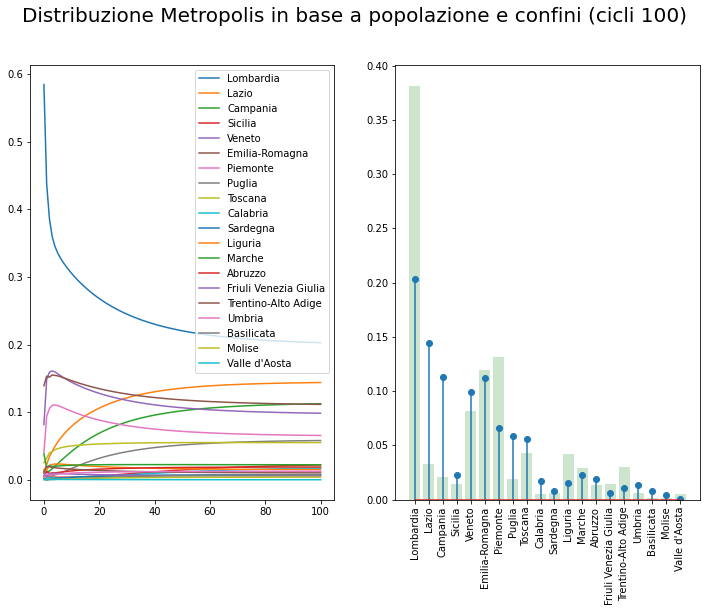

1.0000000000000002


In [590]:
iterations = 100

tot = regioni_table["Popolazione"].sum()
d = np.array(list(init_distr.values()))
percorso = [d]
for i in range(iterations):
    d = regioni_matrix @ d
    percorso.append(d)

fig, ax = plt.subplots(1, 2, figsize=(12,8))

#ax[0].set_yscale("log")
for r in range(20):
    ax[0].plot(np.array(percorso)[:,r], label=regioni_table.iloc[r].name)
    #ax[0].text(iterations, percorso[iterations-1][r], regioni_table.iloc[r].name)
ax[0].legend()
#ax[0].set_ylim(0,.3)
#ax[0].set_xlim(0, 50+30)

ax[1].stem(d, use_line_collection=True)    
plt.xticks(np.arange(20), regioni_table.index, rotation=90)
ax[1].bar(np.arange(20), [regioni_cases_distr[r] for r in regioni_table.index], color="g", alpha=.2)
fig.set_facecolor('w')
plt.suptitle(
    f"Distribuzione Metropolis in base a popolazione e confini (cicli {iterations})",
    fontsize=20
)
plt.show()
plt.close()
print(f"{sum(d)}")

In [584]:
regioni_matrix = np.zeros((20,20))
for r in range(20):
    for c in range(20):
        regioni_matrix[r,c] = from_prob_reg(r, c, key="Densità")

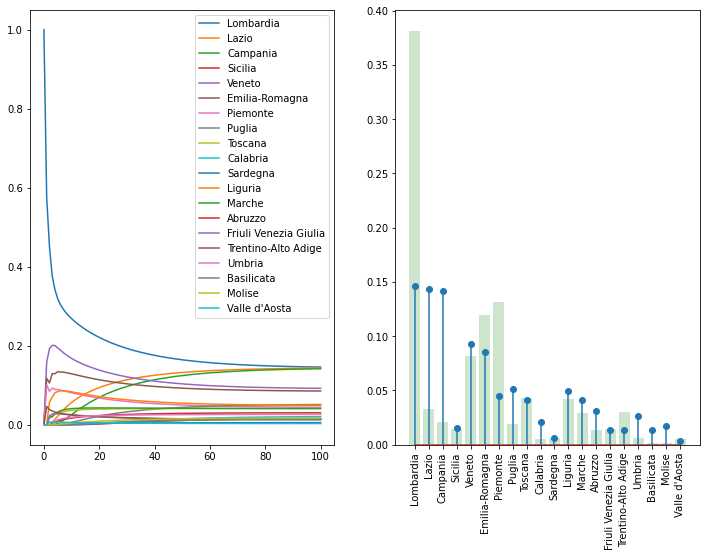

1.0000000000000013


In [585]:
iterations = 100

d = np.zeros(20)
d[0] = 1
percorso = [d]
for i in range(iterations):
    d = regioni_matrix @ d
    percorso.append(d)

fig, ax = plt.subplots(1, 2, figsize=(12,8))

#ax[0].set_yscale("log")
for r in range(20):
    ax[0].plot(np.array(percorso)[:,r], label=regioni_table.iloc[r].name)
    #ax[0].text(iterations, percorso[iterations-1][r], regioni_table.iloc[r].name)
ax[0].legend()
#ax[0].set_ylim(0,.3)
#ax[0].set_xlim(0, 50+30)

ax[1].stem(d, use_line_collection=True)    
plt.xticks(np.arange(20), regioni_table.index, rotation=90)
ax[1].bar(np.arange(20), [regioni_cases_distr[r] for r in regioni_table.index], color="g", alpha=.2)
fig.set_facecolor('w')
plt.show()
plt.close()
print(f"{sum(d)}")

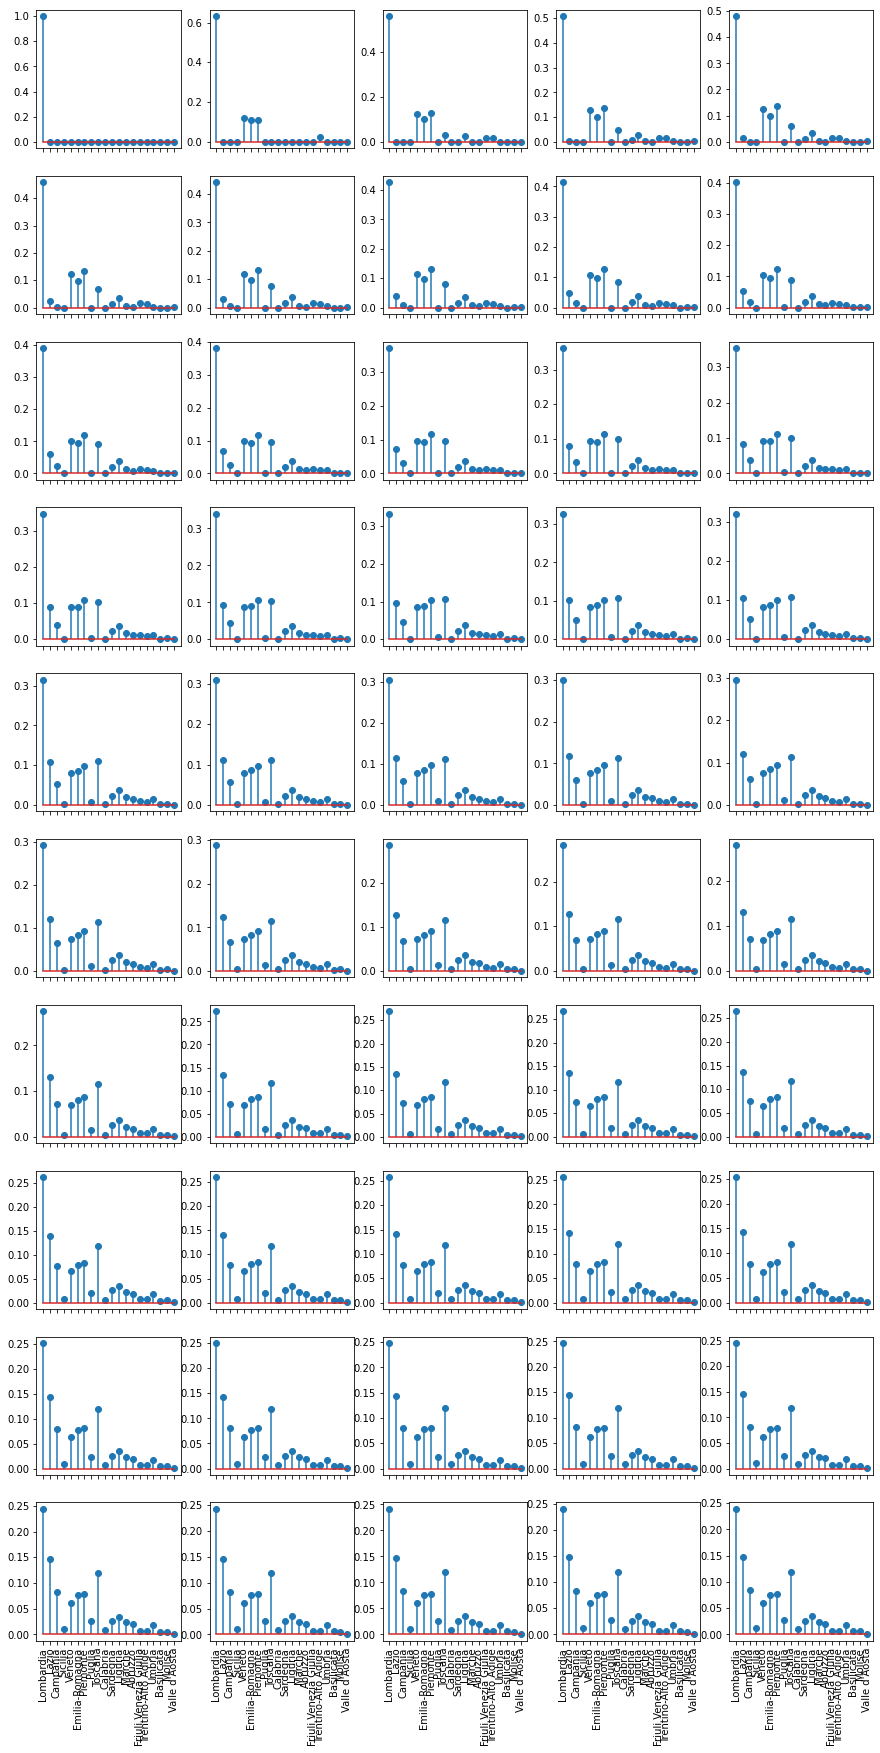

In [314]:
fig, ax = plt.subplots(iterations//5, 5, figsize=(15, 3*iterations//5), sharex=True)
for i in range(iterations):
    ax.flat[i].stem(percorso[i], use_line_collection=True)
for j in range(5):
    ax[iterations//5-1,j].set_xticks(np.arange(20))
    ax[iterations//5-1,j].set_xticklabels(regioni_table.index, rotation=90)